In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers import BatchNormalization # a normalization technique done between the layers of a Neural Network instead of in the raw data. It is done along mini-batches 
                                            # instead of the full data set. It serves to speed up training and use higher learning rates, making learning easier
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# normalizing data set : it is the organization of data to appear similar across all records and fields

X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [ ]:
# categorize training dataset : tf your training data uses classes as numbers, to_categorical will transform those numbers in proper vectors for using with models

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# image augmentation

train_datagen = ImageDataGenerator(rotation_range=45, width_shift_range=0.2, zoom_range = 0.2, horizontal_flip = True)
train_datagen.fit(X_train)

train_generator = train_datagen.flow(X_train, y_train, batch_size = 32)

In [ ]:
# building model

# kernel_initializer : the main purpose is to initialize the weight matrix in the neural network
# he_uniform : Draws samples from a uniform distribution within [-limit, limit] , where limit = sqrt(6 / fan_in) ( fan_in is the number of input units in the weight tensor)

# padding : "same" results in padding with zeros evenly to the left/right or up/down of the input.
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [ ]:
# compile model

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
# train with input data

history = model.fit_generator(train_generator, epochs = 10, validation_data = (X_test, y_test))

<ipython-input-8-fae3249b5ef8>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 10, validation_data = (X_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 517s 328ms/step - loss: 0.2678 - accuracy: 0.4307 - val_loss: 0.2498 - val_accuracy: 0.5110
Epoch 2/10
1563/1563 [==============================] - 517s 331ms/step - loss: 0.1957 - accuracy: 0.5678 - val_loss: 0.1914 - val_accuracy: 0.5835
Epoch 3/10
1563/1563 [==============================] - 515s 329ms/step - loss: 0.1735 - accuracy: 0.6264 - val_loss: 0.1869 - val_accuracy: 0.5946
Epoch 4/10
1563/1563 [==============================] - 510s 327ms/step - loss: 0.1586 - accuracy: 0.6618 - val_loss: 0.1437 - val_accuracy: 0.7043
Epoch 5/10
1563/1563 [==============================] - 528s 338ms/step - loss: 0.1505 - accuracy: 0.6823 - val_loss: 0.1384 - val_accuracy: 0.7093
Epoch 6/10
1563/1563 [==============================] - 525s 336ms/step - loss: 0.1423 - accuracy: 0.7023 - val_loss: 0.1565 - val_accuracy: 0.6778
Epoch 7/10
1563/1563 [==============================] - 524s 336ms/step - loss: 0.1365 - accuracy: 0.7136 - val_

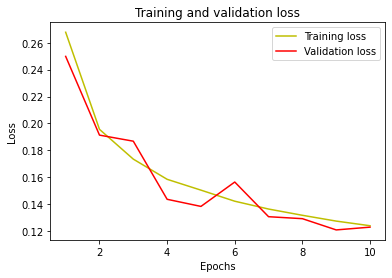

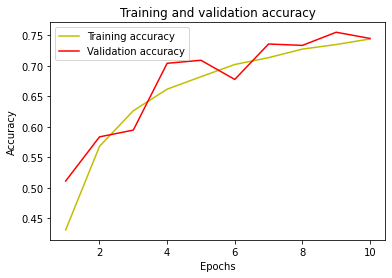

In [ ]:
# plot the training and validation accuracy and loss at each epoch

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

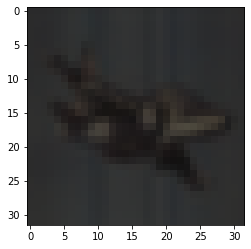

1/1 [==============================] - 0s 280ms/step
probability of image:  [[9.9938703e-01 6.3328820e-08 2.7056565e-05 5.5075296e-05 9.6629177e-05
  3.1982621e-05 1.2017992e-04 3.2163175e-07 2.7812476e-04 3.4562188e-06]]
0


In [ ]:
# making prediction

index = random.randint(0, len(X_test))
plt.imshow(X_test[index, :])
plt.show()

y_pred = model.predict(X_test[index, :].reshape(1, 32, 32, 3))
print('probability of image: ', y_pred)

y_class = np.argmax(y_pred)
print(y_class)

# CLASSES
# 0: airplane
# 1: automobile
# 2: bird
# 3: cat
# 4: deer
# 5: dog
# 6: frog
# 7: horse
# 8: ship
# 9: truck